# Adding Entropy

The idea is to add entropy into the system by measuring the state in a controlled way. If we know that a qubit is up than measuring it adds no entorpy.  On the other hand, if we apply a hadamard gate to a qubit and then measure it, we add $$ S =  -\ln{{2}}$$ to the system.

Furthermore, if we apply Hadamard gates to N qubits and measure those qubits, we add $$ S = -N\ln{2} $$ to the system.

In [ ]:
from Define_Paulis import I, X, Y, Z, Mdot, bkt
import numpy as np
import scipy.linalg as ln

In [2]:
def H(i,N):
    return 1/np.sqrt(2)*(Z(i,N) + X(i,N))

def RH(theta,i,N):
    return Mdot([Z(i,N),np.cos(theta/2)*I(N) - 1j*np.sin(theta/2)*Y(i,N)])

Using Hadamard gates we can only apply entropy in integer multiples of $\ln{2}$.  If we want to add a generalized amount of entropy, we have to use a continuous rotation.  Let's use $$ R_H(\phi) = Z(\cos(\phi/2)I - i\sin(\phi/2)Y) $$ which becomes the Hadamard gate at $\phi = -\pi/2$.

If we apply this gate to a qubit and then measure it, we add $$ S = \cos(\phi/2)^2 \ln{\cos(\phi/2)^2} + \sin(\phi/2)^2 \ln{\sin(\phi/2)^2} $$

Therefore, we can apply $N$ Hadamard gates and 1 $R_H$ gate to add an arbitrary amount of entropy $$ S = N\ln{2} + \cos(\phi/2)^2 \ln{\cos(\phi/2)^2} + \sin(\phi/2)^2 \ln{\sin(\phi/2)^2}. $$

One could apply multiple $R_H$ gates but the entropy becomes exponentially hard to calculate.

In [8]:
def S(rho):
    e,y = ln.eig(rho)
    s = sum([np.round( (e[n]+10**-28)*np.log(e[n]+10**(-28)) , 8) for n in range(len(e))])
    return s

def Sa(phil,il):
    el = [1]
    for i in il:
        eli = []
        for e in el:
            ea = e*np.cos(phil[i]/2)**2
            eb = e*np.sin(phil[i]/2)**2
            eli.append(ea)
            eli.append(eb)
        el = eli
    #print(el)
    s = sum([np.round( (el[n]+10**-28)*np.log(el[n]+10**(-28)) , 8) for n in range(len(el))])
    return s

def M(il,N):
    Ml = [I(N)]
    for i in il:  
        M2 = []
        for M in Ml:
            Ma = 1/2*Mdot([M,(I(N)+Z(i,N))])
            Mb = 1/2*Mdot([M,(I(N)-Z(i,N))])
            M2.append(Ma)
            M2.append(Mb)
        Ml = M2
    return Ml

def Meas(rho,il):
    N = int(np.log2(len(rho)))
    ml = M(il,N)
    rho_new = 0*rho
    for m in ml:
        rho_new = rho_new + Mdot([m,rho,m])
    return rho_new

In [146]:
def rho(N):
    r = np.array( [[0 for i in range(2**N)] for j in range(2**N)] )
    r[0,0] = 1
    return r

N=3
rho0 = rho(N)
phil = [-np.pi/2,-np.pi/2,2.7]
rho1 = Mdot([RH(phil[2],2,N),RH(phil[1],1,N),RH(phil[0],0,N),rho0,RH(phil[0],0,N),RH(phil[1],1,N),RH(phil[2],2,N)])

rho2 = Meas(rho1,[0,1,2])

print( 'norm: ',sum([rho2[i,i] for i in range(len(rho2))]) )
#print(rho2)

norm:  (0.9999999999999998+0j)


In [147]:
S(rho2)

(-1.57877028+0j)

In [148]:
Sa(phil,[0,1,2])

-1.57877028

In [149]:
print('max entropy: ', np.log((1/2)**N))

max entropy:  -2.0794415416798357


In [173]:
sa0 = [Sa([0.0,0.0,0.0],[0,1,2]) for i in range(0,21)]
sa01 = [Sa([0.0,0.0,np.pi/10*i],[0,1,2]) for i in range(0,21)]
sa1 = [Sa([-np.pi/2,0.0,0.0],[0,1,2]) for i in range(0,21)]
sa12 = [Sa([-np.pi/2,0.0,np.pi/10*i],[0,1,2]) for i in range(0,21)]
sa2 = [Sa([-np.pi/2,-np.pi/2,0.0],[0,1,2]) for i in range(0,21)]
sa23 = [Sa([-np.pi/2,-np.pi/2,np.pi/10*i],[0,1,2]) for i in range(0,21)]
sa3 = [Sa([-np.pi/2,-np.pi/2,-np.pi/2],[0,1,2]) for i in range(0,21)]

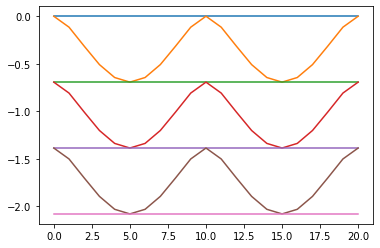

In [174]:
import matplotlib.pyplot as plt

plt.plot(sa0)
plt.plot(sa01)
plt.plot(sa1)
plt.plot(sa12)
plt.plot(sa2)
plt.plot(sa23)
plt.plot(sa3)